# Forest Cover Type

The goal of this project is to predict the correct forest cover type (defined as an integer between 1 and 7), out of 7 possibilities:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The predictions are evaluated using multi-class classification accuracy.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 

The features are:
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The 40 soil types can be found in the data section. 

In [34]:
init_notebook_mode(connected=True)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv("data/train.csv")
# Holdout for 'test' to avoid confusing when splitting training data into train/test
holdout = pd.read_csv("data/test.csv") 

train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [4]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


A first look at the data shows that there are no missing values, and that all our columns are numerical (integer).  We have a total of 15,120 observations in our train dataframe, and 56 columns, out of which 40 are dedicated to soil types.



## EDA
Let's take a closer look at the different features we have available.
We'll start with the target variable (Cover_Type): 
- equally distributed in the data set?
- order? 
- Is there any transformation that needs to happen?

Then the features:
- Can we already spot relationships between specific features and the target?
- Is there any transformation that needs to happen?


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train["Cover_Type"].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

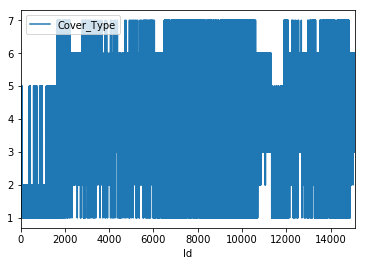

In [7]:
train.plot("Id", "Cover_Type")

### Elevation 

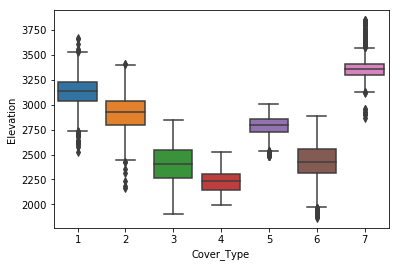

In [8]:
ax = sns.boxplot(x='Cover_Type', y='Elevation', data=train)

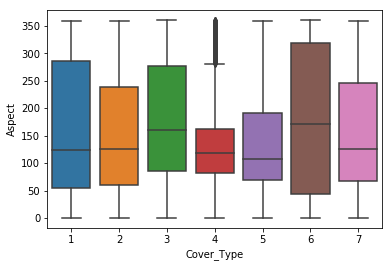

In [9]:
ax = sns.boxplot(x='Cover_Type', y='Aspect', data=train)

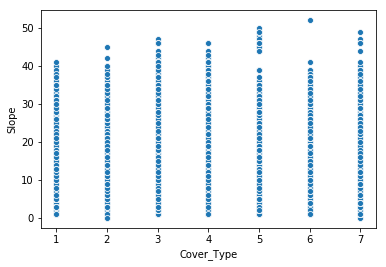

In [10]:
ax = sns.scatterplot(x='Cover_Type', y='Slope', data=train)

* The 7 cover types are equally distributed in our data set. As a result, we won't need to correct inbalance. 
* A clear relationship appears between elevation and cover type. 

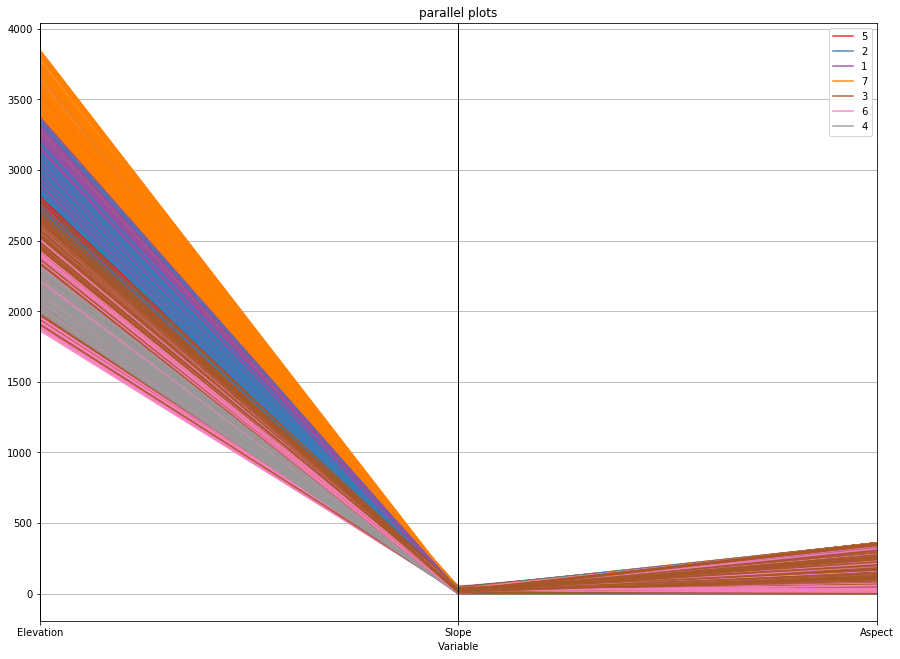

In [78]:
# works with pandas, but there are fewer plotting options

import plotly.plotly as py
from pandas.tools.plotting import parallel_coordinates

temp = train[['Elevation','Slope','Aspect','Cover_Type']]
plt.figure(figsize=(15,11))
parallel_coordinates(temp,'Cover_Type', colormap=plt.get_cmap("Set1"), alpha=0.9)
plt.title("parallel plots")
plt.xlabel("Variable")
plt.show()


In [49]:

import plotly.graph_objs as go
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# try with plotly instead
# the downside is that Parcoords does not have an opacity

data = [
    go.Parcoords(
        line = dict(color = train['Cover_Type'],
                   colorscale = 'Jet',
                   showscale = True),       
        dimensions = list([
            dict(range = [min(train["Elevation"]),max(train["Elevation"])],
                 label = 'Elevation', values = train["Elevation"]),
            dict(range = [min(train["Slope"]),max(train["Slope"])],
                 constraintrange = [min(train["Slope"]),max(train["Slope"])],
                 label = 'Slope', values = train["Slope"]),
            dict(range = [min(train["Aspect"]),max(train["Aspect"])],
                 constraintrange = [min(train["Aspect"]),max(train["Aspect"])],
                 label = 'Aspect', values = train["Aspect"]),
            dict(range = [min(train["Horizontal_Distance_To_Hydrology"]),max(train["Horizontal_Distance_To_Hydrology"])],
                 constraintrange = [min(train["Horizontal_Distance_To_Hydrology"]),max(train["Horizontal_Distance_To_Hydrology"])],
                 label = 'Horizontal_Distance_To_Hydrology', values = train["Horizontal_Distance_To_Hydrology"]),
            dict(range = [min(train["Vertical_Distance_To_Hydrology"]),max(train["Vertical_Distance_To_Hydrology"])],
                 constraintrange = [min(train["Vertical_Distance_To_Hydrology"]),max(train["Vertical_Distance_To_Hydrology"])],
                 label = 'Vertical_Distance_To_Hydrology', values = train["Vertical_Distance_To_Hydrology"]),
        ])
    )
]

py.offline.iplot(data)

To do:
- Cover type as ordered numbers (7>6) while they actually represent categories. We'll need to do something about it
> When we convert a column to the categorical data type, pandas assigns a number from 0 to n-1 (where n is the number of unique values in a column) for each value. The drawback with this approach is that one of the assumptions of linear regression is violated here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's no actual numerical meaning to the categorical codes that pandas assigned for that column. An increase in the Utilities column from 1 to 2 has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with 0 is different than the one associated with 1).
> The common solution is to use a technique called dummy coding. Instead of having a single column with n integer codes, we have n binary columns. 
*dummy_cols = pd.get_dummies()
dummy_cols = pd.DataFrame()
for col in text_cols:
     (Transform col)
    col_dummies = pd.get_dummies(train[col])
   (Add dummy columns to train df, delete the original text col from train df)
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]*

- In case there's an order in the data, we'll need to mix it up to ensure we don't give our algorithm more clues than it should have (random_order = np.random.permutation(len(df)) // df = df.loc[random_order]).

Next steps
## Engineering New Features
## Selecting the Best-Performing Features
## Selecting and Tuning Different Algorithms
## Conclusion


In [ ]:
def save_submission_file(model, cols, filename="submission.csv"):
    holdout_predictions = model.predict(holdout[cols])
    holdout_ids = holdout["Id"]
    
    submission_df = {"Id": holdout_ids,
                    "Cover_Type": holdout_predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    

#best_rf_model = best_model[2]["best_model"]
#save_submission_file(best_rf_model,best_columns)